In [1]:
from vhepmc_evt_parser import data_set
import numpy as np
import physics as phys
import vmath as vm 
import CMS_analysis as ana
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy
import cms_plotter as cms_plt
import basic_plotter as bp
import pandas as pd
import seaborn as sns

In [2]:
#Load a data set - lifetime generations are included below
my_set = data_set()
my_set.set_parent(parent_pid = 999999)
my_set.set_decay_options(np.array([11,13,211]))
#my_set.fill_custom("events_CMS_card-cms-m:2-ct:100_mm05.dat")
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m2-ct100_mm05_set.npy")

Fill saved: --- 0.004651308059692383 seconds ---


In [3]:
dpA, muA, amuA, tracksA, jetsA= ana.prep_dataset(my_set)

In [4]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:8-ct:10_mm05.dat")
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m8-ct10_mm05_set.npy")
dpB, muB, amuB, tracksB, jetsB = ana.prep_dataset(my_set)

Fill saved: --- 0.005887746810913086 seconds ---


In [5]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m15-ct1_mm05_set.npy")
dpC, muC, amuC, tracksC, jetsC = ana.prep_dataset(my_set)

Fill saved: --- 0.0050809383392333984 seconds ---


In [6]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_B_to_LLP-mp5-ct1_mm09_full_set.npy")
dpD, muD, amuD, tracksD, jetsD = ana.prep_dataset(my_set)

Fill saved: --- 0.02138543128967285 seconds ---


In [7]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_B_to_LLP-m2-ct10_mm09_full_set.npy")
dpE, muE, amuE, tracksE, jetsE = ana.prep_dataset(my_set)

Fill saved: --- 0.030155181884765625 seconds ---


In [8]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_B_to_LLP-m4-ct100_mm09_full_set.npy")
dpF, muF, amuF, tracksF, jetsF = ana.prep_dataset(my_set)

Fill saved: --- 0.0198819637298584 seconds ---


## List choices for cuts - right now the event cut (combined L1T and HLT_lxy) is automatic

In [9]:
ana.list_choices()

Set filter by inputting an array of choices
Event:0:L1T_cut
Event:1:HLT_lxy_cut
Pair:2:HLT_iso_cut
Pair:3:HLT_dphi_muonsDV_cut
Pair:4:HLT_dphi_muons_cut
Pair:5:HLT_pileup_cut
Pair:6:HLT_dxy_cut


## Figure 1
Distribution of $p_T^{\mu\mu}$ for data events and illustrative benchmark signal models, after applying the full event selection.

In [10]:
cuts = np.array([True, True, False, True, True, True, True]) #Don't include any additional HLT cuts
#cuts = np.array([False, False, False, False, False, False, False]) #Apply no cuts - see full distributions

In [19]:
sigma = 0.1 

In [20]:
final_dpA, final_muA, final_amuA, final_cutA, final_evt_cutA = ana.get_cms_eff(sigma, dpA, muA, amuA, tracksA, jetsA, cuts)

Final: 1054 muon pairs
Ratio: 0.0527
Analyze time: --- 0.06638002395629883 seconds ---


In [22]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(sigma, dpB, muB, amuB, tracksB, jetsB, cuts)

Final: 13034 muon pairs
Ratio: 0.6517
Analyze time: --- 0.06071138381958008 seconds ---


In [23]:
final_dpC, final_muC, final_amuC, final_cutC, final_evt_cutC = ana.get_cms_eff(sigma, dpC, muC, amuC, tracksC, jetsC, cuts)

Final: 11050 muon pairs
Ratio: 0.5525
Analyze time: --- 0.09647488594055176 seconds ---


In [24]:
final_dpD, final_muD, final_amuD, final_cutD, final_evt_cutD = ana.get_cms_eff(sigma, dpD, muD, amuD, tracksD, jetsD, cuts)

Final: 1147 muon pairs
Ratio: 0.5493295019157088
Analyze time: --- 0.008744001388549805 seconds ---


In [25]:
final_dpE, final_muE, final_amuE, final_cutE, final_evt_cutE = ana.get_cms_eff(sigma, dpE, muE, amuE, tracksE, jetsE, cuts)

Final: 2165 muon pairs
Ratio: 0.6706939281288724
Analyze time: --- 0.0197906494140625 seconds ---


Note: Figures 2, 3, 4 contain condition lxy > 1cm & lxy < 11cm

In [26]:
labelA = 'H->ZdZd_m:2-ct:100'
labelB = 'H->ZdZd_m:8-ct:10'
labelC = 'H->ZdZd_m:15-ct:1'
labelD = 'B->phi_m:0.5-ct:1'
labelE = 'B->phi_m:2-ct:10'

In [27]:
dimuon_pTA = phys.comb_pT(final_muA.get(final_cutA), final_amuA.get(final_cutA))
dimuon_pTB = phys.comb_pT(final_muB.get(final_cutB), final_amuB.get(final_cutB))
dimuon_pTC = phys.comb_pT(final_muC.get(final_cutC), final_amuC.get(final_cutC))
dimuon_pTD = phys.comb_pT(final_muD.get(final_cutD), final_amuD.get(final_cutD))
dimuon_pTE = phys.comb_pT(final_muE.get(final_cutE), final_amuE.get(final_cutE))

In [28]:
hs = 'step'
lw = 1.5
nbins = 50
rng = (0, 100.)
dns = True

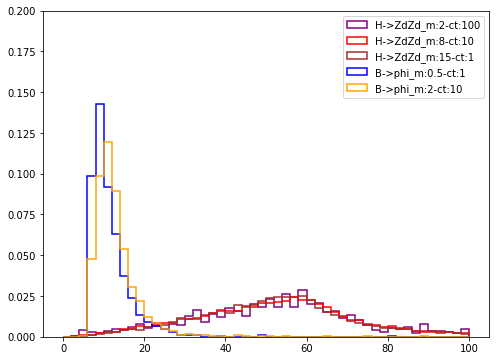

In [29]:
fig = plt.figure(figsize=(8,6))
plt.ylim((0,0.2))
plt.hist(dimuon_pTA, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='purple', label=labelA)
plt.hist(dimuon_pTB, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='red', label=labelB)
plt.hist(dimuon_pTC, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='brown', label=labelC)
plt.hist(dimuon_pTD, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='blue', label=labelD)
plt.hist(dimuon_pTE, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='orange', label=labelE)
plt.legend()
plt.show()
fig.savefig("../images/add_fig_1.png")

In [30]:
ana.print_cut_selection(cuts)

Cut choices
True:L1T_cut
True:HLT_lxy_cut
False:HLT_iso_cut
True:HLT_dphi_muonsDV_cut
True:HLT_dphi_muons_cut
True:HLT_pileup_cut
True:HLT_dxy_cut


## Figure 2 
Distribution of $\Delta(\mu\mu, \vec{DV})$ for data events and illustrative benchmark signal models, after applying the trigger selections and muon and DV quality criteria. 

In [31]:
cuts = np.array([True, False, False, False, False, False, False]) #Don't include any additional HLT cuts

In [34]:
final_dpA, final_muA, final_amuA, final_cutA, final_evt_cutA = ana.get_cms_eff(sigma, dpA, muA, amuA, tracksA, jetsA, cuts)

Final: 17692 muon pairs
Ratio: 0.8846
Analyze time: --- 0.06743979454040527 seconds ---


In [35]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(sigma, dpB, muB, amuB, tracksB, jetsB, cuts)

Final: 17370 muon pairs
Ratio: 0.8685
Analyze time: --- 0.060971975326538086 seconds ---


In [36]:
final_dpC, final_muC, final_amuC, final_cutC, final_evt_cutC = ana.get_cms_eff(sigma, dpC, muC, amuC, tracksC, jetsC, cuts)

Final: 16730 muon pairs
Ratio: 0.8365
Analyze time: --- 0.0599367618560791 seconds ---


In [37]:
#Note: Just the trigger selections remove the vast majority of the B model
final_dpD, final_muD, final_amuD, final_cutD, final_evt_cutD = ana.get_cms_eff(sigma, dpD, muD, amuD, tracksD, jetsD, cuts)

Final: 2088 muon pairs
Ratio: 1.0
Analyze time: --- 0.006824016571044922 seconds ---


In [38]:
final_dpE, final_muE, final_amuE, final_cutE, final_evt_cutE = ana.get_cms_eff(sigma, dpE, muE, amuE, tracksE, jetsE, cuts)

Final: 3228 muon pairs
Ratio: 1.0
Analyze time: --- 0.007715463638305664 seconds ---


In [39]:
final_cutA = final_cutA & (phys.lxy(final_muA) > 10.) & (phys.lxy(final_muA) < 110.)
final_cutB = final_cutB & (phys.lxy(final_muB) > 10.) & (phys.lxy(final_muB) < 110.)
final_cutC = final_cutC & (phys.lxy(final_muC) > 10.) & (phys.lxy(final_muC) < 110.)
final_cutD = final_cutD & (phys.lxy(final_muD) > 10.) & (phys.lxy(final_muD) < 110.)
final_cutE = final_cutE & (phys.lxy(final_muE) > 10.) & (phys.lxy(final_muE) < 110.)

In [40]:
DV = deepcopy(final_muA.xi)
DV[:,3] = 0
pmm = (final_muA.p + final_amuA.p)
dphiA = vm.vec4_dphi(DV, pmm)

In [41]:
DV = deepcopy(final_muB.xi)
DV[:,3] = 0
pmm = (final_muB.p + final_amuB.p)
dphiB = vm.vec4_dphi(DV, pmm)

In [42]:
DV = deepcopy(final_muC.xi)
DV[:,3] = 0
pmm = (final_muC.p + final_amuC.p)
dphiC = vm.vec4_dphi(DV, pmm)

In [43]:
DV = deepcopy(final_muD.xi)
DV[:,3] = 0
pmm = (final_muD.p + final_amuD.p)
dphiD = vm.vec4_dphi(DV, pmm)

In [44]:
DV = deepcopy(final_muE.xi)
DV[:,3] = 0
pmm = (final_muE.p + final_amuE.p)
dphiE = vm.vec4_dphi(DV, pmm)

In [45]:
hs = 'step'
lw = 1.5
nbins = 20
rng = (0, 0.2)
dns = True

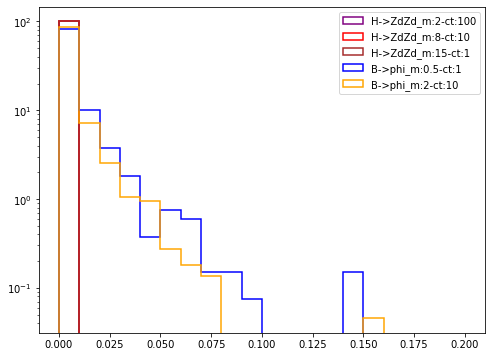

In [46]:
fig = plt.figure(figsize=(8,6))
plt.yscale('log')
plt.hist(dphiA[final_cutA], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="purple", label=labelA)
plt.hist(dphiB[final_cutB], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="red", label=labelB)
plt.hist(dphiC[final_cutC], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="brown", label=labelC)
plt.hist(dphiD[final_cutD], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="blue", label=labelD)
plt.hist(dphiE[final_cutE], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="orange", label=labelE)
plt.legend()
plt.show()
fig.savefig("../images/add_fig_2.png")

In [47]:
ana.print_cut_selection(cuts)

Cut choices
True:L1T_cut
False:HLT_lxy_cut
False:HLT_iso_cut
False:HLT_dphi_muonsDV_cut
False:HLT_dphi_muons_cut
False:HLT_pileup_cut
False:HLT_dxy_cut


## Figure 3
Distribution of $log_{10}(|\Delta\eta_{\mu\mu}|/\Delta\phi_{\mu\mu}|)$ in data events and illustrative benchmark signal models. The cut value is indicated by the red vertical dashed line. All selections except those involivng muon isolation, $d_{xy}$, and number of excess hits in the pixel tracker for each muon are applied. 

In [48]:
cuts = np.array([True, True, False, True, True, False, False])
final_dpA, final_muA, final_amuA, final_cutA, final_evt_cutA = ana.get_cms_eff(sigma, dpA, muA, amuA, jetsA, tracksA, cuts)

Final: 1198 muon pairs
Ratio: 0.0599
Analyze time: --- 0.06850290298461914 seconds ---


In [49]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(sigma, dpB, muB, amuB, jetsB, tracksB, cuts)

Final: 15219 muon pairs
Ratio: 0.76095
Analyze time: --- 0.0796351432800293 seconds ---


In [50]:
final_dpC, final_muC, final_amuC, final_cutC, final_evt_cutC = ana.get_cms_eff(sigma, dpC, muC, amuC, tracksC, jetsC, cuts)

Final: 16557 muon pairs
Ratio: 0.82785
Analyze time: --- 0.06248831748962402 seconds ---


In [51]:
final_dpD, final_muD, final_amuD, final_cutD, final_evt_cutD = ana.get_cms_eff(sigma, dpD, muD, amuD, tracksD, jetsD, cuts)

Final: 1641 muon pairs
Ratio: 0.7859195402298851
Analyze time: --- 0.008352518081665039 seconds ---


In [52]:
final_dpE, final_muE, final_amuE, final_cutE, final_evt_cutE = ana.get_cms_eff(sigma, dpE, muE, amuE, tracksD, jetsD, cuts)

Final: 2376 muon pairs
Ratio: 0.7360594795539034
Analyze time: --- 0.010111570358276367 seconds ---


In [53]:
final_cutA = final_cutA & (phys.lxy(final_muA) > 10.) & (phys.lxy(final_muA) < 110.)
final_cutB = final_cutB & (phys.lxy(final_muB) > 10.) & (phys.lxy(final_muB) < 110.)
final_cutC = final_cutC & (phys.lxy(final_muC) > 10.) & (phys.lxy(final_muC) < 110.)
final_cutD = final_cutD & (phys.lxy(final_muD) > 10.) & (phys.lxy(final_muD) < 110.)
final_cutE = final_cutE & (phys.lxy(final_muE) > 10.) & (phys.lxy(final_muE) < 110.)

In [54]:
pileupA = phys.pileup(final_muA, final_amuA)
pileupB = phys.pileup(final_muB, final_amuB)
pileupC = phys.pileup(final_muC, final_amuC)
pileupD = phys.pileup(final_muD, final_amuD)
pileupE = phys.pileup(final_muE, final_amuE)

In [55]:
hs = 'step'
lw = 1.5
nbins = 20
rng = (0, 0.2)
dns = True

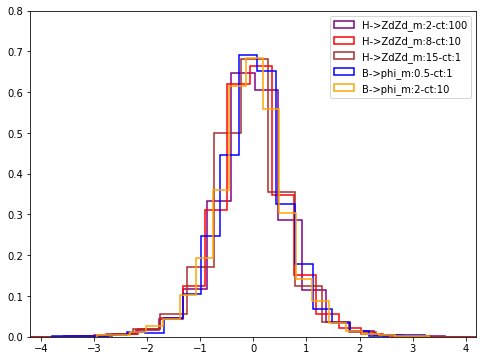

In [56]:
fig = plt.figure(figsize=(8,6))
plt.ylim((0,0.8))
plt.xlim((-4.2,4.2))
plt.hist(pileupA, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="purple", label=labelA)
plt.hist(pileupB, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="red", label=labelB)
plt.hist(pileupC, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="brown", label=labelC)
plt.hist(pileupD, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="blue", label=labelD)
plt.hist(pileupE, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="orange", label=labelE)
plt.legend()
plt.show()
fig.savefig("../images/add_fig_3.png")

In [57]:
ana.print_cut_selection(cuts)

Cut choices
True:L1T_cut
True:HLT_lxy_cut
False:HLT_iso_cut
True:HLT_dphi_muonsDV_cut
True:HLT_dphi_muons_cut
False:HLT_pileup_cut
False:HLT_dxy_cut
